In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss,roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn import preprocessing
from tensorflow import keras

In [41]:
#reading dataframes

train_data = pd.read_pickle('train_all.pkl')
val_data = pd.read_pickle('val_all.pkl')
test_data =pd.read_pickle('test_all.pkl')

In [42]:
train_data.shape

(5051, 65537)

In [43]:
test_data.shape

(618, 65537)

In [44]:
# X and target y for training data
X_train= train_data.iloc[:,0:-1]
y_train= train_data.iloc[:, -1]

# X and target y for val data
X_val= val_data.iloc[:,0:-1]
y_val= val_data.iloc[:, -1]


# X and target y for test data
X_test= test_data.iloc[:,0:-1]
y_test= test_data.iloc[:, -1]

In [45]:
#X_train.head()

In [46]:
#Rescale values by dividing by 255

X_train =X_train.div(255)
X_val =X_val.div(255)
X_test =X_test.div(255)

In [47]:
#X_train.head()

In [48]:
X_train.shape

(5051, 65536)

In [49]:
y_train.shape

(5051,)

In [50]:
# 256x256 images

X_train = X_train.values.reshape((-1,256,256,1)) 

In [51]:
X_train.shape

(5051, 256, 256, 1)

In [52]:
#Simple CNN  with  Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, InputLayer,BatchNormalization, Dropout 

NN_cnn = Sequential(
                        [InputLayer(input_shape=X_train.shape[1:]),
                         Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Flatten(),
                         Dense(units=40, activation="relu"),
                         Dropout(0.05),
                         Dense(units=10, activation="relu"),
                         Dropout(0.05),
                         Dense(units=1, activation="sigmoid"),
                         ])

NN_cnn.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])


In [53]:
NN_cnn.fit(x=X_train, y=y_train, epochs=15)

Epoch 1/15
158/158 [==============================] - 113s 712ms/step - loss: 0.5873 - accuracy: 0.7329
Epoch 2/15
158/158 [==============================] - 113s 714ms/step - loss: 0.4486 - accuracy: 0.7934
Epoch 3/15
158/158 [==============================] - 116s 732ms/step - loss: 0.2743 - accuracy: 0.8879
Epoch 4/15
158/158 [==============================] - 113s 715ms/step - loss: 0.2033 - accuracy: 0.9231
Epoch 5/15
158/158 [==============================] - 113s 714ms/step - loss: 0.1717 - accuracy: 0.9387
Epoch 6/15
158/158 [==============================] - 111s 702ms/step - loss: 0.1513 - accuracy: 0.9458
Epoch 7/15
158/158 [==============================] - 116s 735ms/step - loss: 0.1398 - accuracy: 0.9503
Epoch 8/15
158/158 [==============================] - 115s 730ms/step - loss: 0.1287 - accuracy: 0.9549
Epoch 9/15
158/158 [==============================] - 115s 730ms/step - loss: 0.1266 - accuracy: 0.9509
Epoch 10/15
158/158 [==============================] - 121s 766m

In [54]:
# 256x256 images for val set

X_val = X_val.values.reshape((-1,256,256,1)) 
X_val.shape

(16, 256, 256, 1)

In [55]:
# Val Prediction using CNN
y_val_nn = NN_cnn.predict(X_val)

#convert  y_test_nn prob to  binary y_test_nn_b

y_val_nn_b = y_val_nn
y_val_nn_b[y_val_nn_b  < 0.50 ] = 0
y_val_nn_b[y_val_nn_b  >= 0.50 ] = 1

#Neural Network Test Accuracy

val_accuracy = accuracy_score(y_val, y_val_nn)*100
#test_auc_roc = roc_auc_score(y_test, y_test_nn)*100

print('Confusion matrix:\n', confusion_matrix(y_val, y_val_nn))

#print('Test AUC: %.4f %%' % test_auc_roc)

print('Val accuracy: %.4f %%' % val_accuracy)

#Classification report for NN model

print(classification_report(y_val, y_val_nn_b, digits=3))

Confusion matrix:
 [[8 0]
 [1 7]]
Val accuracy: 93.7500 %
              precision    recall  f1-score   support

           0      0.889     1.000     0.941         8
           1      1.000     0.875     0.933         8

    accuracy                          0.938        16
   macro avg      0.944     0.938     0.937        16
weighted avg      0.944     0.938     0.937        16



In [56]:
# 256x256 images for test set

X_test = X_test.values.reshape((-1,256,256,1)) 
X_test.shape

(618, 256, 256, 1)

In [57]:
# Test Prediction using Neural Network
y_test_nn = NN_cnn.predict(X_test)

#convert  y_test_nn prob to  binary y_test_nn_b

y_test_nn_b = y_test_nn
y_test_nn_b[y_test_nn_b  < 0.50 ] = 0
y_test_nn_b[y_test_nn_b  >= 0.50 ] = 1

#Neural Network Test Accuracy

test_accuracy = accuracy_score(y_test, y_test_nn)*100
#test_auc_roc = roc_auc_score(y_test, y_test_nn)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_nn))

#print('Test AUC: %.4f %%' % test_auc_roc)

print('Test accuracy: %.4f %%' % test_accuracy)

#Classification report for NN model

print(classification_report(y_test, y_test_nn_b, digits=3))

Confusion matrix:
 [[149  82]
 [ 14 373]]
Test accuracy: 84.4660 %
              precision    recall  f1-score   support

           0      0.914     0.645     0.756       231
           1      0.820     0.964     0.886       387

    accuracy                          0.845       618
   macro avg      0.867     0.804     0.821       618
weighted avg      0.855     0.845     0.838       618



<AxesSubplot:>

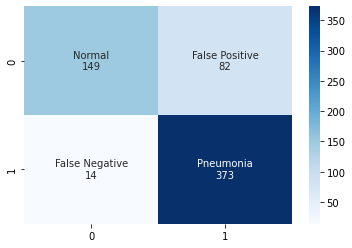

In [58]:
#confusion matrix as heat map

import seaborn as sns
c_matrix =confusion_matrix(y_test, y_test_nn)


group_names = ['Normal', 'False Positive', 'False Negative', 'Pneumonia']
group_counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2  in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)


sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')